## WEEK 11

### Euclidean distance

In [ ]:
import scipy
from scipy.spatial import distance

In [ ]:
import numpy as np
a = [1, 2, 3]
b = [4, 5, 6]
dst = distance.euclidean(a, b)
dst

5.196152422706632

### Minkowski distance
If p = 1 then Manhattan distance
If p = 2 then Euclidean distance

In [ ]:
distance.minkowski([1, 0, 0], [0, 1, 0], 1) #Manhattan distance

2.0

In [ ]:
distance.minkowski([1, 0, 0], [0, 1, 0], 2) #Euclidean distance

1.4142135623730951

### Disimilarity or distance matrix

In [ ]:
import pandas as pd
from scipy.spatial import distance_matrix

data = [[1, 4], [2, 5], [3, 6]]
df = pd.DataFrame(data, columns=['a', 'b'])
df

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
pd.DataFrame(distance_matrix(df.values, df.values))

,0,1,2
0,0.000000,1.414214,2.828427
1,1.414214,0.000000,1.414214
2,2.828427,1.414214,0.000000


In [ ]:
data = [[15, 95], [49, 156], [13, 95], [45, 160], [85, 178], [66, 176], [12, 90], [10, 78]]
ctys = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
df = pd.DataFrame(data, columns=['Weight', 'Height'], index=ctys)
df

,Weight,Height
A,15,95
B,49,156
C,13,95
D,45,160
E,85,178
F,66,176
G,12,90
H,10,78


In [ ]:
Distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
Distance_matrix

,A,B,C,D,E,F,G,H
A,0.000000,69.835521,2.000000,71.589105,108.577162,95.718337,5.830952,17.720045
B,69.835521,0.000000,70.830784,5.656854,42.190046,26.248809,75.663730,87.206651
C,2.000000,70.830784,0.000000,72.449983,109.877204,96.798760,5.099020,17.262677
D,71.589105,5.656854,72.449983,0.000000,43.863424,26.400758,77.388630,89.157165
E,108.577162,42.190046,109.877204,43.863424,0.000000,19.104973,114.337221,125.000000
F,95.718337,26.248809,96.798760,26.400758,19.104973,0.000000,101.548018,112.871608
G,5.830952,75.663730,5.099020,77.388630,114.337221,101.548018,0.000000,12.165525
H,17.720045,87.206651,17.262677,89.157165,125.000000,112.871608,12.165525,0.000000


In [ ]:
Distance_matrix.round(decimals=1, out=None)

,A,B,C,D,E,F,G,H
A,0.0,69.8,2.0,71.6,108.6,95.7,5.8,17.7
B,69.8,0.0,70.8,5.7,42.2,26.2,75.7,87.2
C,2.0,70.8,0.0,72.4,109.9,96.8,5.1,17.3
D,71.6,5.7,72.4,0.0,43.9,26.4,77.4,89.2
E,108.6,42.2,109.9,43.9,0.0,19.1,114.3,125.0
F,95.7,26.2,96.8,26.4,19.1,0.0,101.5,112.9
G,5.8,75.7,5.1,77.4,114.3,101.5,0.0,12.2
H,17.7,87.2,17.3,89.2,125.0,112.9,12.2,0.0


### K-Means clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clustering_ex.xlsx to Clustering_ex.xlsx


In [ ]:
data = pd.read_excel('Clustering_ex.xlsx')
print(data)

   Variable_1  Variable_2
0         1.0         1.0
1         1.5         2.0
2         3.0         4.0
3         5.0         7.0
4         3.5         5.0
5         4.5         5.0
6         3.5         4.5


<Figure size 500x500 with 0 Axes>

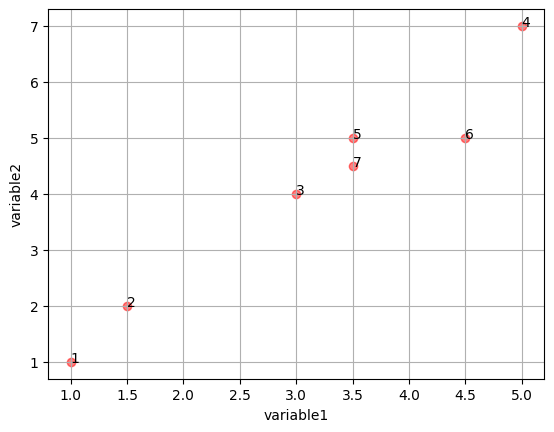

In [ ]:
fig = plt.figure(figsize=(5, 5))
x = data['Variable_1']
y = data['Variable_2']
n = range(1, 8)
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o', c='red', alpha=0.5)
plt.grid()
plt.xlabel("variable1")
plt.ylabel("variable2")
for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))

2 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
centroids

array([[3.9 , 5.1 ],
       [1.25, 1.5 ]])

<Figure size 500x500 with 0 Axes>

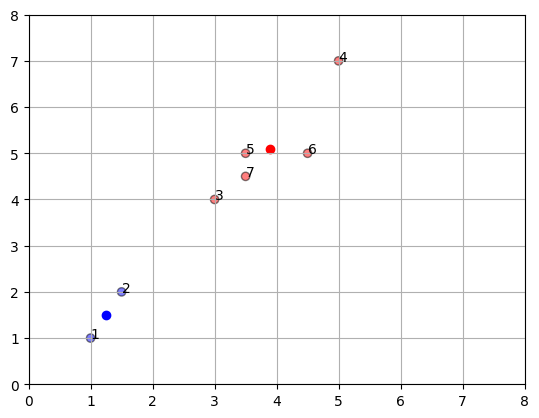

In [ ]:
fig = plt.figure(figsize=(5, 5))
colmap = {1:'r', 2:'b'}
colors = map(lambda x:colmap[x+1], labels)
colors1 = list(colors)
fig, ax = plt.subplots()
ax.scatter(x, y, color=colors1, edgecolor='k', alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])

for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))
plt.grid()
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
centroids

array([[3.625, 4.625],
       [1.25 , 1.5  ],
       [5.   , 7.   ]])

<Figure size 500x500 with 0 Axes>

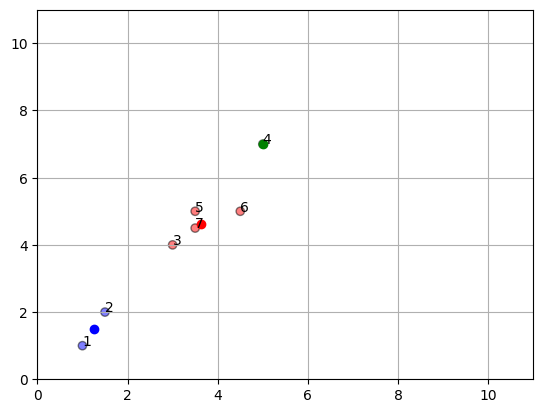

In [ ]:
fig = plt.figure(figsize=(5, 5))
colmap = {1:'r', 2:'b', 3:'g'}
colors = map(lambda x:colmap[x+1], labels)
colors1 = list(colors)
fig, ax = plt.subplots()
ax.scatter(x, y, color=colors1, edgecolor='k', alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])

for i, txt in enumerate(n):
  ax.annotate(txt, (x[i], y[i]))
plt.grid()
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.show()